### NOTE
1) Using meta estimator and random forest
2) Import BaggingClasssifier and randomforestclassifier from sklearn.ensemble

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import make_moons

In [2]:
x,y = make_moons(n_samples=1000,noise=0.2)

In [27]:
x

array([[-0.3224973 ,  0.51212131],
       [ 0.69704811, -0.61539774],
       [-0.49700786,  1.22146656],
       ...,
       [ 0.63469724, -0.42912629],
       [-0.31944444,  0.98803375],
       [ 0.40387505, -0.43186592]])

In [28]:
y

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,

In [29]:
df = {'x1':x[:,0],"x2":x[:,1],"y":y}

In [30]:
df = pd.DataFrame(df)

In [32]:
df

,x1,x2,y
0,-0.322497,0.512121,1
1,0.697048,-0.615398,1
2,-0.497008,1.221467,0
3,0.917984,0.094163,0
4,0.275060,1.003741,0
...,...,...,...
995,0.275627,1.082688,0
996,1.164229,-0.360528,1
997,0.634697,-0.429126,1
998,-0.319444,0.988034,0


<Axes: xlabel='x1', ylabel='x2'>

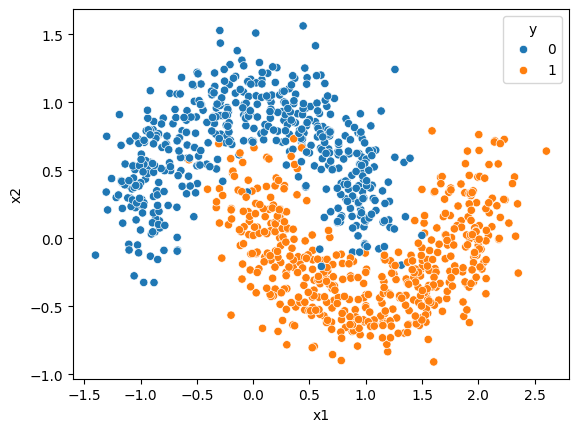

In [8]:
sns.scatterplot(x="x1",y="x2",hue="y",data=df)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_a = df.iloc[:,:-1]
y_a = df["y"]

In [11]:
x_a,y_a

(           x1        x2
 0   -0.322497  0.512121
 1    0.697048 -0.615398
 2   -0.497008  1.221467
 3    0.917984  0.094163
 4    0.275060  1.003741
 ..        ...       ...
 995  0.275627  1.082688
 996  1.164229 -0.360528
 997  0.634697 -0.429126
 998 -0.319444  0.988034
 999  0.403875 -0.431866
 
 [1000 rows x 2 columns],
 0      1
 1      1
 2      0
 3      0
 4      0
       ..
 995    0
 996    1
 997    1
 998    0
 999    1
 Name: y, Length: 1000, dtype: int64)

In [12]:
y_a

0      1
1      1
2      0
3      0
4      0
      ..
995    0
996    1
997    1
998    0
999    1
Name: y, Length: 1000, dtype: int64

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,random_state=42,test_size=0.2)

In [14]:
x_train

,x1,x2
29,0.633012,0.634984
535,2.009091,0.094136
695,0.703311,-0.348117
557,0.846826,0.642099
836,1.372689,-0.174847
...,...,...
106,1.341662,-0.695681
270,0.299713,-0.782078
860,0.390092,0.321016
435,1.594603,-0.155419


In [15]:
x_test

,x1,x2
521,0.567759,0.995235
737,1.770214,-0.350560
740,-0.040207,0.898687
660,0.747811,-0.478490
411,0.605014,0.766184
...,...,...
408,0.293737,-0.274007
332,-0.592405,0.869343
208,-1.187451,0.910626
613,-0.674448,0.007530


In [16]:
y_train

29     0
535    1
695    1
557    0
836    1
      ..
106    1
270    1
860    1
435    1
102    0
Name: y, Length: 800, dtype: int64

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [18]:
bg = BaggingClassifier(estimator=SVC(),n_estimators=30)
bg.fit(x_train,y_train)

BaggingClassifier(estimator=SVC(), n_estimators=30)

In [19]:
sv = SVC()
sv.fit(x_train,y_train)

SVC()

In [20]:
sv.score(x_train,y_train),sv.score(x_test,y_test)

(0.97625, 0.95)

In [21]:
bg.score(x_train,y_train),bg.score(x_test,y_test)

(0.97625, 0.95)

In [22]:
# RANDOM FOREST 

In [23]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)


RandomForestClassifier(n_estimators=10)

In [24]:
rf.score(x_train,y_train),rf.score(x_test,y_test)

(0.99875, 0.96)